In [3]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\Karan\Desktop\Karan\Python\Chess_Stat_Analysis\Chess_Stats\Chess_games_stats.csv'
chess_data = pd.read_csv(file_path)

# Display the first few rows and summary information about the data
chess_data.head(), chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18637 entries, 0 to 18636
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      18637 non-null  int64 
 1   Game ID                         18637 non-null  object
 2   White Rating                    18637 non-null  int64 
 3   Black Rating                    18637 non-null  int64 
 4   Opening ECO                     18637 non-null  object
 5   Opening Ply                     18637 non-null  int64 
 6   White Centi-pawn Loss           18637 non-null  int64 
 7   White's Number of Inaccuracies  18637 non-null  int64 
 8   White's Number of Mistakes      18637 non-null  int64 
 9   White's Number of Blunders      18637 non-null  int64 
 10  Black Centi-pawn Loss           18637 non-null  int64 
 11  Black's Number of Inaccuracies  18637 non-null  int64 
 12  Black's Number of Mistakes      18637 non-null

(   Unnamed: 0   Game ID  White Rating  Black Rating Opening ECO  Opening Ply  \
 0           0  J7Xvjkte          1441          1559         C20            4   
 1           1  SSzpi7W1          1258          1567         C46            6   
 2           2  NHpcYm3r          1697          1712         C68            7   
 3           3  Nrzmgzmn          1978          1868         D31            5   
 4           4  xMuFsnC6          2073          1816         A01            2   
 
    White Centi-pawn Loss  White's Number of Inaccuracies  \
 0                     32                               2   
 1                     43                               0   
 2                     11                               1   
 3                     21                               3   
 4                     35                               3   
 
    White's Number of Mistakes  White's Number of Blunders  \
 0                           2                           0   
 1                  

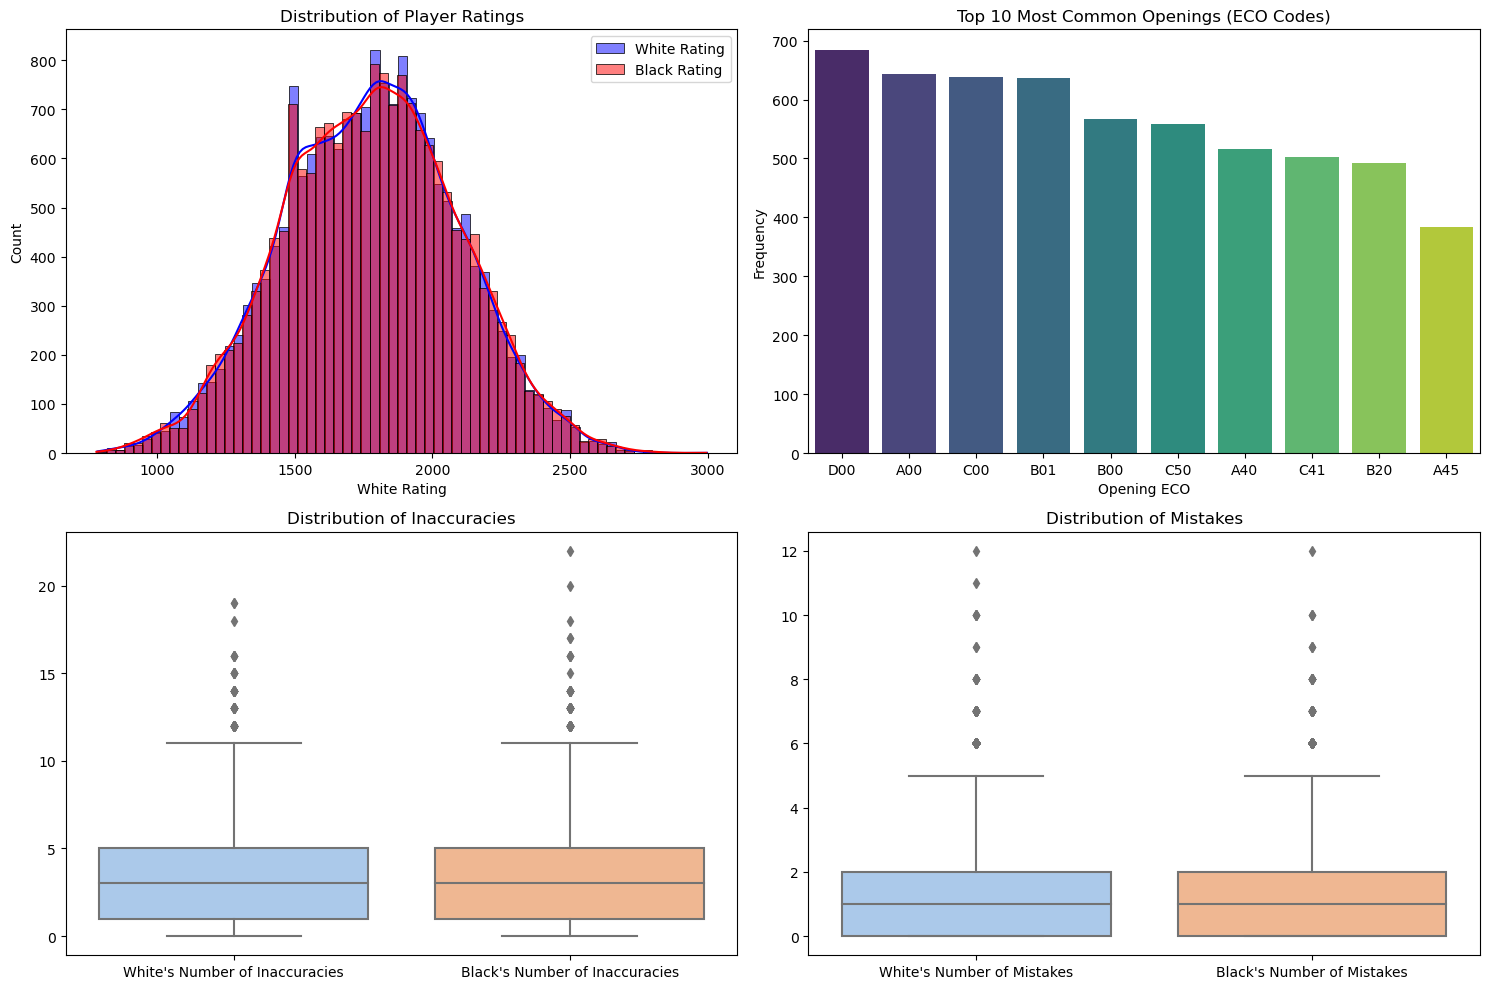

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# 1. Distribution of player ratings (White and Black)
plt.subplot(2, 2, 1)
sns.histplot(chess_data['White Rating'], kde=True, color='blue', label='White Rating')
sns.histplot(chess_data['Black Rating'], kde=True, color='red', label='Black Rating')
plt.title('Distribution of Player Ratings')
plt.legend()

# 2. Most common openings (ECO codes)
plt.subplot(2, 2, 2)
top_openings = chess_data['Opening ECO'].value_counts().head(10)
sns.barplot(x=top_openings.index, y=top_openings.values, palette='viridis')
plt.title('Top 10 Most Common Openings (ECO Codes)')
plt.xlabel('Opening ECO')
plt.ylabel('Frequency')

# 3. Distribution of inaccuracies, mistakes, and blunders for both White and Black
plt.subplot(2, 2, 3)
sns.boxplot(data=chess_data[['White\'s Number of Inaccuracies', 'Black\'s Number of Inaccuracies']], palette='pastel')
plt.title('Distribution of Inaccuracies')

plt.subplot(2, 2, 4)
sns.boxplot(data=chess_data[['White\'s Number of Mistakes', 'Black\'s Number of Mistakes']], palette='pastel')
plt.title('Distribution of Mistakes')

plt.tight_layout()
plt.show()


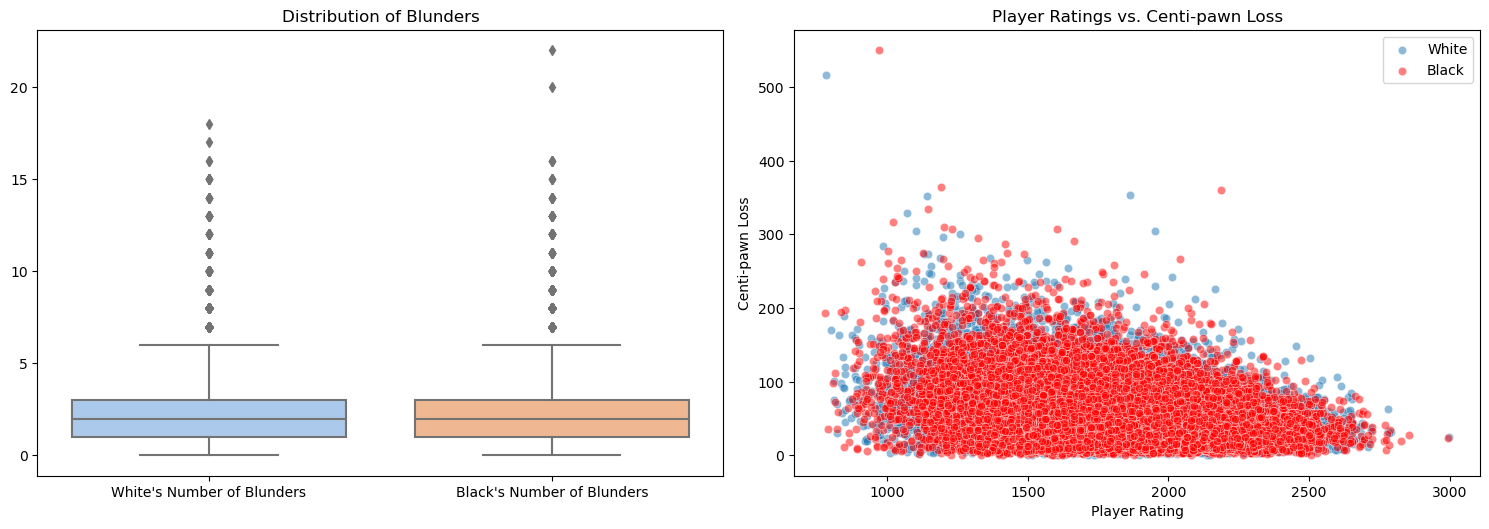

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# 4. Distribution of blunders for both White and Black
plt.subplot(2, 2, 1)
sns.boxplot(data=chess_data[['White\'s Number of Blunders', 'Black\'s Number of Blunders']], palette='pastel')
plt.title('Distribution of Blunders')

# 5. Relationship between player ratings and centi-pawn loss
plt.subplot(2, 2, 2)
sns.scatterplot(x='White Rating', y='White Centi-pawn Loss', data=chess_data, label='White', alpha=0.5)
sns.scatterplot(x='Black Rating', y='Black Centi-pawn Loss', data=chess_data, label='Black', alpha=0.5, color='red')
plt.title('Player Ratings vs. Centi-pawn Loss')
plt.xlabel('Player Rating')
plt.ylabel('Centi-pawn Loss')
plt.legend()

plt.tight_layout()
plt.show()


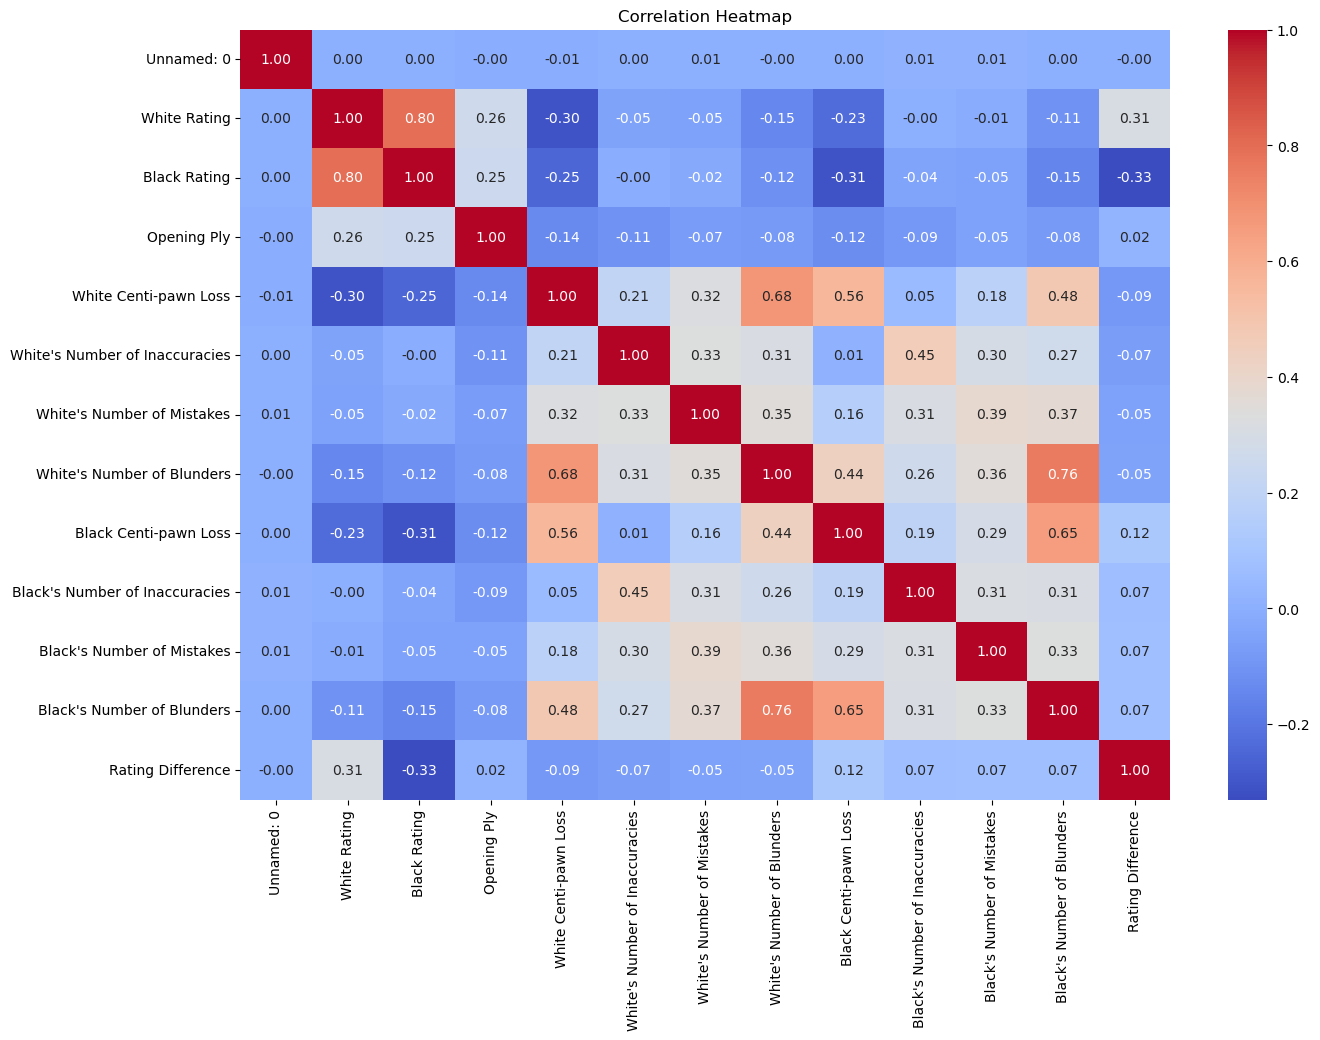

In [10]:
# Calculate rating difference
chess_data['Rating Difference'] = chess_data['White Rating'] - chess_data['Black Rating']

# Select only the numeric columns for correlation
numeric_cols = chess_data.select_dtypes(include='number')

# 1. Correlation Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()


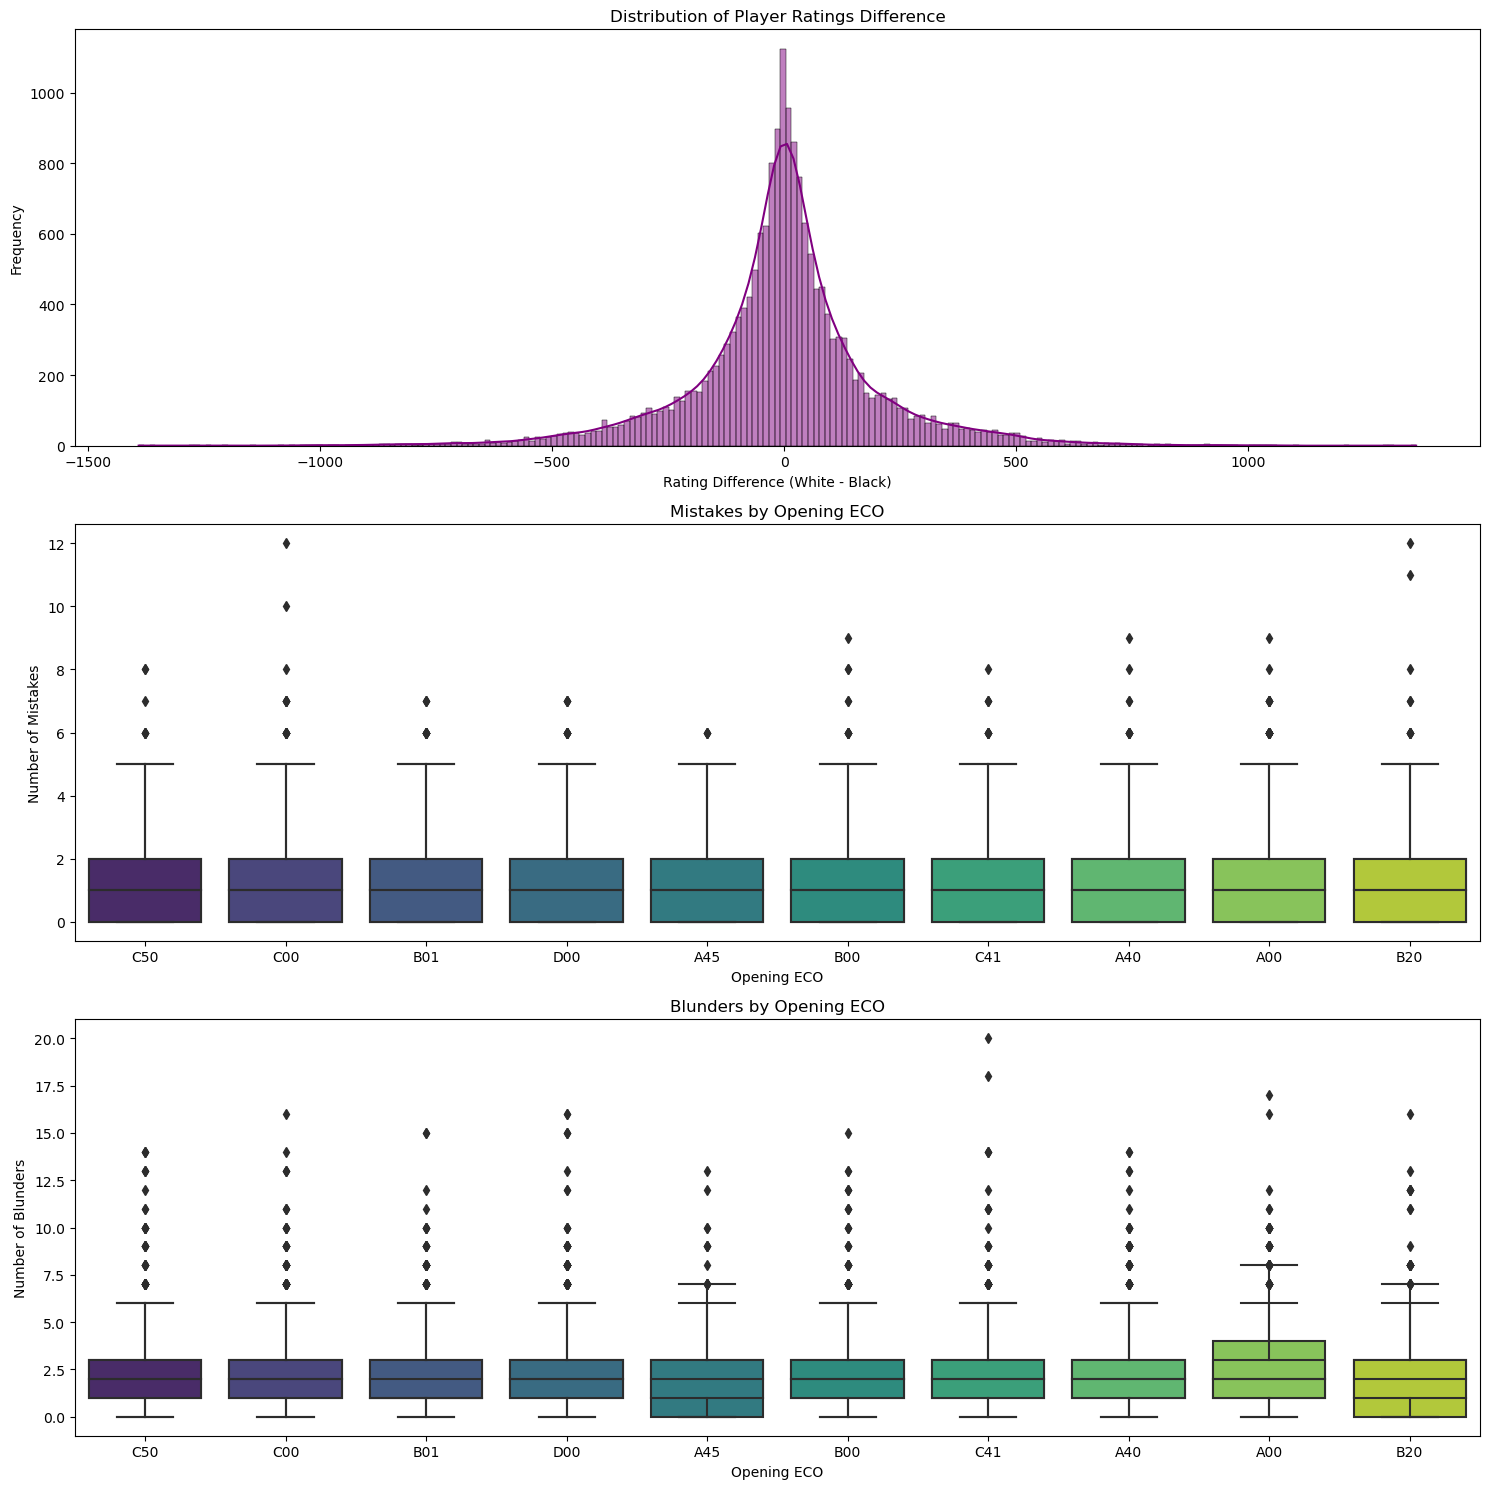

In [7]:
# Calculate rating difference
chess_data['Rating Difference'] = chess_data['White Rating'] - chess_data['Black Rating']

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# 1. Distribution of Player Ratings Difference
plt.subplot(3, 1, 1)
sns.histplot(chess_data['Rating Difference'], kde=True, color='purple')
plt.title('Distribution of Player Ratings Difference')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')

# 2. Mistakes and Blunders by Opening ECO
plt.subplot(3, 1, 2)
top_openings = chess_data['Opening ECO'].value_counts().head(10).index
mistakes_blunders_openings = chess_data[chess_data['Opening ECO'].isin(top_openings)]
sns.boxplot(x='Opening ECO', y='White\'s Number of Mistakes', data=mistakes_blunders_openings, palette='viridis')
sns.boxplot(x='Opening ECO', y='Black\'s Number of Mistakes', data=mistakes_blunders_openings, palette='viridis', color='red')
plt.title('Mistakes by Opening ECO')
plt.xlabel('Opening ECO')
plt.ylabel('Number of Mistakes')

plt.subplot(3, 1, 3)
sns.boxplot(x='Opening ECO', y='White\'s Number of Blunders', data=mistakes_blunders_openings, palette='viridis')
sns.boxplot(x='Opening ECO', y='Black\'s Number of Blunders', data=mistakes_blunders_openings, palette='viridis', color='red')
plt.title('Blunders by Opening ECO')
plt.xlabel('Opening ECO')
plt.ylabel('Number of Blunders')

plt.tight_layout()
plt.show()


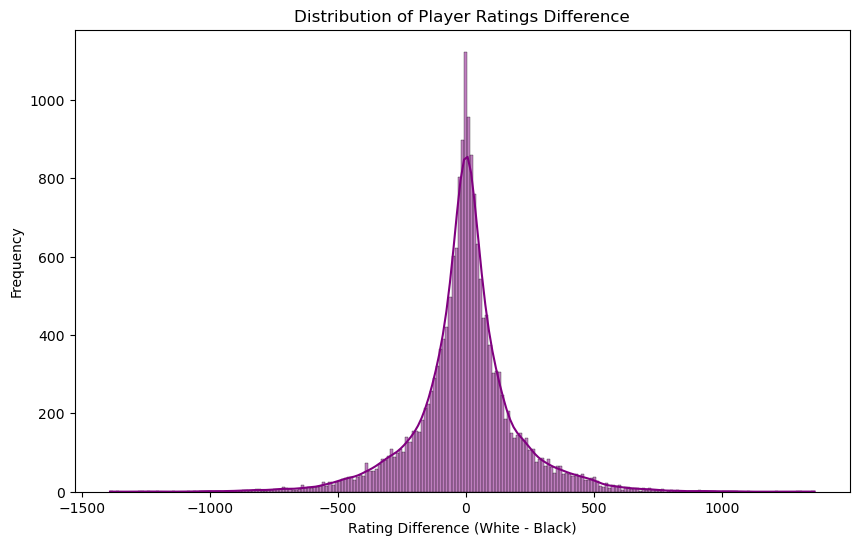

In [8]:
# Calculate rating difference
chess_data['Rating Difference'] = chess_data['White Rating'] - chess_data['Black Rating']

# Distribution of Player Ratings Difference
plt.figure(figsize=(10, 6))
sns.histplot(chess_data['Rating Difference'], kde=True, color='purple')
plt.title('Distribution of Player Ratings Difference')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')

plt.show()
